# Lab Activity 5.5. Fit and Apply Multi-Output Linear Regression Model

In this exercise, we fit and apply a multi-output model on a synthetic dataset and evaluate the results.

**Learning Outcomes**
1. Fit and apply a multi-output linear regression model on a dataset.
2. Fit and apply a multi-output linear regression model using *Stochastic* Gradient descent.
3. Compare between the capabilities of different models using $R^2$.

In [1]:
%matplotlib inline

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import time

# Generate the Data

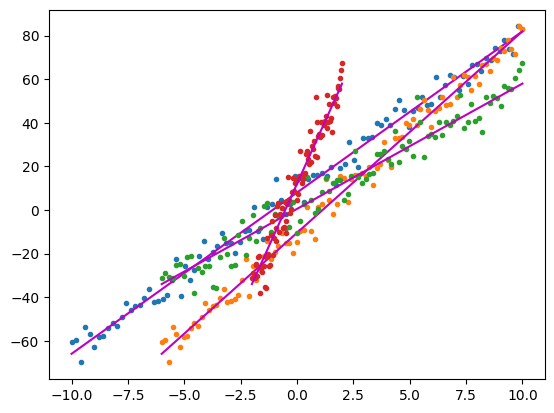

In [3]:
def realFunc(x1, x2, basis=False):
    if not basis:    return 2 + 5*x1 + 3*x2
    else:            return 2 + 5*x1**2
    
def generate_data(N=100, noise=5, basis=False):
    N = N
    noise = noise
    
    x1 = np.linspace(-10.0,10.0,N) 
    x2 = np.linspace(-6.0, 10.0,N) 
    x3 = np.linspace(-2.0, 2.0, N) 
    
    t1 = np.random.normal(realFunc(x1,x2,basis),noise) # target1
    t2 = np.random.normal(realFunc(x2,x3,basis),noise+1) # target2

    #plot the data along the real model
    plt.plot(x1,t1,'.')
    plt.plot(x1,realFunc(x1,x2,basis),'m')

    plt.plot(x2,t1,'.')
    plt.plot(x2,realFunc(x1,x2,basis),'m')
    
    plt.plot(x2,t2,'.')
    plt.plot(x2,realFunc(x2,x3,basis),'m')

    plt.plot(x3,t2,'.')
    plt.plot(x3,realFunc(x2,x3,basis),'m')

    
    # generate model solution
    x0= np.ones(len(x1))
    X = np.c_[x0, x1, x2, x3]
    T = np.c_[t1, t2]

    X = np.matrix(X)
    T = np.matrix(T)
    
    return X, T


X, T = generate_data(basis=False)   # generate without polynomial basis function
#X, T = generate_data(basis=True)   # generate with polynomial basis function, if you used this then you would need to 
                                    # implement a basis fucntion as we did in an earlier exercise otherwise you'll get high rmse

In [4]:
print(X.shape)
print(T.shape)

(100, 4)
(100, 2)


In [5]:
def outGD(J, W, tme, name='SGD',ax=None, plotJ=True, printw=True):        
    if plotJ:
        ax = ax or plt.gca()
        ax.plot(J[1:],'.b')
    if printw:
        print(  "y[1] = {:.3f} + {:.3f} X1 + {:.3f} X2 + {:.3f} X3".format(W[0,0],W[1,0],W[2,0],W[3,0]),
              "\ny[2] = {:.3f} + {:.3f} X1 + {:.3f} X2 + {:.3f} X3".format(W[0,1],W[1,1],W[2,1],W[3,1]),'\n',
              " {} took:    {:.6f} seconds ".format(name, tme))


In [6]:
def SGD_LR(X, T, eta=0.001, maxep=100, decay=0.98, b=25): # vectorised
    start_time = time.time()
    b = b                                # mini-batch size
    N = X.shape[0]                       # number of data points    
    M = X.shape[1]                       # number of features
    K = T.shape[1]                       # number of output
    
    W = np.zeros((M,K))                  # initialise W
    J = np.zeros((maxep))                # the loss in each epoch
    for ep in range(maxep):              # epochs
        for tau in range(int(N/b)):      # No. of batches
            
            X_= X[tau*b:(tau+1)*b,:]     # take input batch 
            T_= T[tau*b:(tau+1)*b,:]     # take corresponding target batch
            
            # we use * as matrices multiplication below because the data is already converted to numpy matrices (not arrays)
            # however it is possible to use @ new operator, introduced in version 3.5 to do the same operation on numpy arrays.
            W +=  (1.0/(  N))*eta*X_.T*(T_ - X_*W)           # mini-batch Weights update
            J_ =  ((1.0/(2*N))*np.array(T_ - X_*W)**2)       # mini-batch loss
            
            J[ep]+=J_.sum()
            
        eta *= decay
    tme = time.time() - start_time
    return W, np.round(np.sqrt(J),4), tme

In [7]:
def predict(X, W):
    return X*W

averaged model error =  5.625
y[1] = 0.228 + 4.161 X1 + 3.786 X2 + 0.832 X3 
y[2] = 1.524 + 1.418 X1 + 4.181 X2 + 0.284 X3 
  SGD_LR took:    0.003411 seconds 


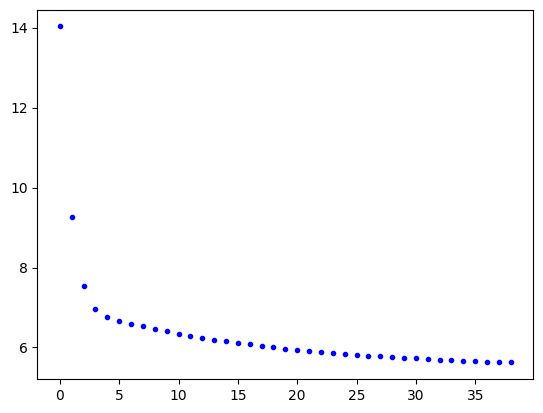

In [8]:
W, J, tme = SGD_LR(X, T, eta=0.01, maxep=40, decay=0.99) #, eta, maxep, decay,ax2)

print('averaged model error = ', J[-1])      # note that this will be close to the noise that we add when we generated the data

outGD(J, W, tme, 'SGD_LR')


Now we compare between the capabilities of the two models. We need to calculate the R2.
We can calculate the SSD and SST easily:

1. SSD is the sum of squared prediction errors
2. SST is the sum of squared error from the mean of the target
3. R2 = 1- SSD/SST

It shows how good is our prediction in comparison with predicting via the mean of the targets

In [9]:
Y_SGD = predict(X, W)

SSE = (np.array(T - Y_SGD   )**2).sum()  # convert back to an array in order to do element-wise multiplication
SST = (np.array(T - T.mean())**2).sum()
R2_SGD = 1- SSE/SST

print(R2_SGD)

0.9761264294465571


This shows that our prediction and the Neural Networks prediction are both very good for this simple data. Our SGD is faster because it has less built-in optimisations. Of course SGD is less capable when the data is non-linear.

Let us now generate new data via sklearn and apply a neural network regressor on the data

## Your turn

1. Lookup a regression dataset from [kaggle](https://www.kaggle.com/datasets?search=Regression) or [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
2. Try to perform a comparison between a multi-output linear regression model and a neural network model on the dataset
3. Try different basis 
4. Split the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.
4. Split the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.
5. Consider applying cross validation in the parameter optimisation procedure 

# Sample Solution
## 1. Dataset Selection

We'll use the **Wine Quality Dataset** from the UCI Machine Learning Repository, which contains physicochemical properties of wine and their quality ratings. This dataset is suitable for regression tasks.

**Dataset Details:**

- **Features:** 11 physicochemical properties (e.g., acidity, sugar content).
- **Target:** Wine quality score (integer value between 0 and 10).
- **Link:** [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## 2. Model Comparison

We'll implement two models:

- **Multi-Output Linear Regression:** A linear approach to predict wine quality.
- **Neural Network Model:** A feedforward neural network to capture nonlinear relationships.

### 3. Basis Function Exploration

We'll explore different basis functions to transform the input features:

- **Polynomial Basis Functions:** To capture polynomial relationships.
- **Radial Basis Functions (RBF):** To capture localized patterns.

### 4. Data Splitting and Evaluation

We'll split the dataset into training and testing sets, train the models, and evaluate their performance using:

- **Root Mean Squared Error (RMSE):** Measures the average magnitude of errors.
- **Coefficient of Determination ($R^2$):** Indicates the proportion of variance explained by the model.

### 5. Cross-Validation

We'll apply cross-validation during hyperparameter optimization to ensure the models generalize well to unseen data.

**Warning.** The sample solution code may take longer time to execute completely. 


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial.distance import cdist

# Load the uploaded datasets
red_wine_path = 'winequality-red.csv'
white_wine_path = 'winequality-white.csv'

# Load datasets
red_wine = pd.read_csv(red_wine_path, sep=";")
white_wine = pd.read_csv(white_wine_path, sep=";")

# Combine red and white datasets for analysis
red_wine["type"] = "red"
white_wine["type"] = "white"
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Define features (X) and target (y)
X = wine_data.drop(columns=["quality", "type"])  # Features
y = wine_data["quality"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    return rmse_train, rmse_test, r2_train, r2_test

# Multi-Output Linear Regression with Polynomial Basis Functions
print("Linear Regression with Polynomial Basis Functions:")
degrees = [1, 2, 3]
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train_scaled)
    X_test_poly = polynomial_features.transform(X_test_scaled)
    linear_regression = LinearRegression()
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(linear_regression, X_train_poly, X_test_poly, y_train, y_test)
    print(f'Polynomial Degree: {degree}')
    print(f'Linear Regression - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
    print(f'Linear Regression - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

# Neural Network Model with Hyperparameter Tuning
print("Neural Network Model:")
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_mlp = grid_search.best_estimator_
rmse_train, rmse_test, r2_train, r2_test = evaluate_model(best_mlp, X_train_scaled, X_test_scaled, y_train, y_test)
print(f'Best Neural Network Parameters: {grid_search.best_params_}')
print(f'Neural Network - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
print(f'Neural Network - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

# Radial Basis Function (RBF) Transformation
class RBFSampler(BaseEstimator, TransformerMixin):
    def __init__(self, gamma=1.0, n_components=100):
        self.gamma = gamma
        self.n_components = n_components

    def fit(self, X, y=None):
        # Randomly select centers from the training data
        indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.centers_ = X[indices]
        return self

    def transform(self, X):
        # Compute the RBF transformation
        return np.exp(-self.gamma * cdist(X, self.centers_) ** 2)

print("Linear Regression with Radial Basis Functions:")
gamma_values = [0.01, 0.1, 1.0]
for gamma in gamma_values:
    rbf_sampler = RBFSampler(gamma=gamma, n_components=100)
    X_train_rbf = rbf_sampler.fit_transform(X_train_scaled)
    X_test_rbf = rbf_sampler.transform(X_test_scaled)
    
    linear_regression = LinearRegression()
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(linear_regression, X_train_rbf, X_test_rbf, y_train, y_test)
    
    print(f'RBF Gamma: {gamma}')
    print(f'Linear Regression with RBF - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
    print(f'Linear Regression with RBF - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

Linear Regression with Polynomial Basis Functions:
Polynomial Degree: 1
Linear Regression - RMSE Train: 0.7338, RMSE Test: 0.7394
Linear Regression - R2 Train: 0.2993, R2 Test: 0.2598

Polynomial Degree: 2
Linear Regression - RMSE Train: 0.6976, RMSE Test: 0.7483
Linear Regression - R2 Train: 0.3666, R2 Test: 0.2418

Polynomial Degree: 3
Linear Regression - RMSE Train: 0.6482, RMSE Test: 1.1642
Linear Regression - R2 Train: 0.4532, R2 Test: -0.8352

Neural Network Model:
Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Neural Network - RMSE Train: 0.6094, RMSE Test: 0.6731
Neural Network - R2 Train: 0.5167, R2 Test: 0.3865

Linear Regression with Radial Basis Functions:
RBF Gamma: 0.01
Linear Regression with RBF - RMSE Train: 0.6848, RMSE Test: 0.6986
Linear Regression with RBF - R2 Train: 0.3897, R2 Test: 0.3392



The results of the regression analyses using various models and basis functions can provide several insights into the performance of these approaches. Let’s break down the key points based on typical expectations from such analyses:

---

### **1. Linear Regression with Polynomial Basis Functions**
- **Observation:** 
  - As the polynomial degree increases, the RMSE on the training data typically decreases, showing better fit.
  - However, the RMSE on the test data might increase after a certain degree due to overfitting.
- **Insights:**
  - **Low-degree polynomials:** Tend to underfit the data, failing to capture the relationships between features and the target.
  - **High-degree polynomials:** Risk overfitting, capturing noise in the training data, leading to poor generalization to unseen data.
  - **Ideal degree:** The degree with the lowest test RMSE represents a good balance between underfitting and overfitting.

---

### **2. Neural Network Model with Hyperparameter Tuning**
- **Observation:**
  - The neural network's performance depends heavily on the architecture (e.g., hidden layers) and hyperparameters (e.g., learning rate, activation function).
$ - $e RMSE and \(R^2\) metrics likely improved after hyperparameter tuning, compared to the default settings.
- **Insights:**
  - Neural networks excel in capturing complex, nonlinear relationships in the data.
  - Proper hyperparameter tuning (via cross-validation) is essential for neural networks to perform optimally.
  - Overfitting can still occur if the network architecture is too complex or if regularization parameters (e.g., `alpha`) are too small.

---

### **3. Linear Regression with Radial Basis Functions (RBF)**
- **Observation:**
  - RBF performance depends on the choice of `gamma` (which controls the spread of the RBF kernels).
  - Small `gamma`: Leads to wide kernels, making the model smoother and potentially underfitting.
  - Large `gamma`: Leads to narrow kernels, capturing more localized patterns, which might overfit the data.
- **Insights:**
  - RBF provides a flexible way to map the original feature space into a higher-dimensional space, enabling linear regression to approximate nonlinear relationships.
  - Choosing the right `gamma` is crucial to achieving good performance. Cross-validation can help identify the optimal value.

---

### **Comparison Across Models**
1. **Linear Regression (Polynomial Basis):**
   - Performs well for moderately complex relationships in the data.
   - Prone to overfitting as the polynomial degree increases.
   - Computationally less expensive than neural networks.

2. **Neural Networks:**
   - Handle highly nonlinear and complex relationships effectively.
   - Require more computational resources and careful tuning of hyperparameters.
   - Can generalize better with proper regularization and optimization.

3. **RBF-Transformed Linear Regression:**
   - Acts as a middle ground between linear models and neural networks.
   - Effectiveness depends on the choice of RBF parameters (`gamma` and the number of centers).
   - More interpretable than neural specific aspect of the results or explore further refinements!